In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt


COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
blues = ["#0d88e6", "#8ECDDD", "#22668D", "#42d4f4", ]
import textwrap


In [2]:
import matplotlib
plt.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'Retina'
task = "retina"
num_layers = 3
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/retina_xor_multi_arch/{res_folder}"

In [4]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-10-24-10-00-54_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"

In [5]:
first_analsis_res_folder_ergm = f"{results_path}/{res_folder}/ergm/6_features/per_dim_results/first_analysis_results"
first_analsis_file_name_ergm = "2023-11-28-11-50-11_all_results_from_ergm_6_features_per_dim_results_with_motifs_5000_ep_no_duplicates.csv"

first_analsis_ergm = pd.read_csv(f"{first_analsis_res_folder_ergm}/{first_analsis_file_name_ergm}")

In [6]:
first_analsis_file_name_ergm_random_init = "2023-12-02-09-38-04_all_results_from_ergm_6_features_per_dim_results_with_motifs_5000_ep_no_duplicates_random_init.csv"

first_analsis_ergm_random_init = pd.read_csv(f"{first_analsis_res_folder_ergm}/{first_analsis_file_name_ergm_random_init}")

In [7]:
first_analsis_res_folder_genet = f"{results_path}/{res_folder}/requiered_features_genetic_models/6_features/good_archs/per_dim_results/first_analysis_results"
first_analsis_file_name_genet = f"2023-12-02-15-58-41_all_results_from_requiered_features_genetic_models_6_features_good_archs_per_dim_results__with_motifs_5000_ep_no_duplicates_1s.csv"
first_analsis_genet = pd.read_csv(f"{first_analsis_res_folder_genet}/{first_analsis_file_name_genet}")

In [8]:
first_analsis_orig = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
ranges = np.linspace(0, 1, 11)
performances_q = (
    first_analsis_orig['mean_performance'].quantile(ranges[-2]),
    first_analsis_orig['mean_performance'].quantile(ranges[-1]))

In [9]:
first_analsis_orig_top = first_analsis_orig[first_analsis_orig['mean_performance'] >= performances_q[0]]

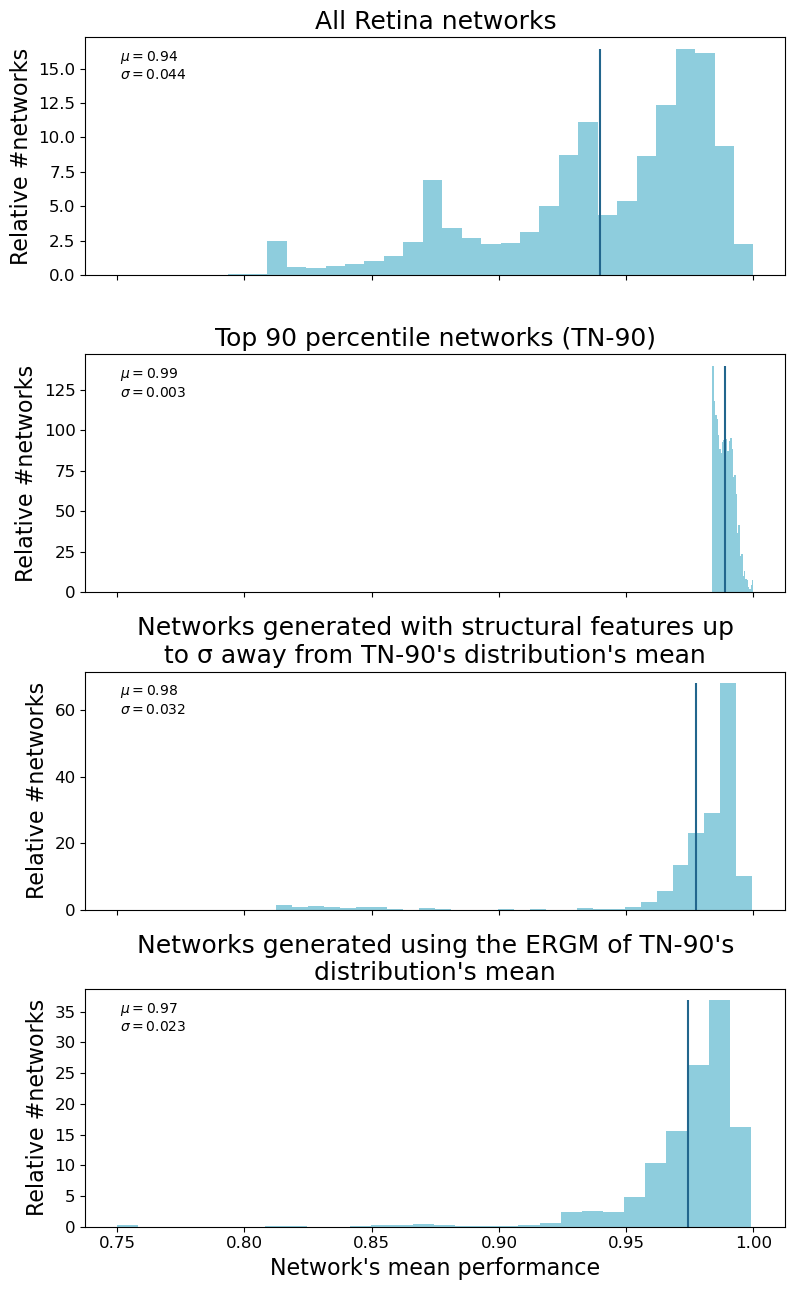

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 13), sharex='all')

n1, bins, patches = ax1.hist(first_analsis_orig['mean_performance'], color=blues[1],  density=True, bins=30,)
ax1.vlines(first_analsis_orig['mean_performance'].mean(), ymin=0, ymax=max(n1),  colors=blues[2])
ax1.set_title("All Retina networks", fontsize=18)
textstr = '\n'.join((
        r'$\mu=%.2f$' % (first_analsis_orig['mean_performance'].mean(),),
        r'$\sigma=%.3f$' % (first_analsis_orig['mean_performance'].std(),)))
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=10,                   verticalalignment='top', )

n2, bins, patches = ax2.hist(first_analsis_orig_top['mean_performance'], color=blues[1],  density=True, bins=30,)
ax2.vlines(first_analsis_orig_top['mean_performance'].mean(), ymin=0, ymax=max(n2),  colors=blues[2])
ax2.set_title("Top 90 percentile networks (TN-90)", fontsize=18)
textstr = '\n'.join((
        r'$\mu=%.2f$' % (first_analsis_orig_top['mean_performance'].mean(),),
        r'$\sigma=%.3f$' % (first_analsis_orig_top['mean_performance'].std(),)))
ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=10,                   verticalalignment='top', )

n3, bins, patches = ax3.hist(first_analsis_genet['mean_performance'], color=blues[1],  density=True, bins=30,)
ax3.vlines(first_analsis_genet['mean_performance'].mean(), ymin=0, ymax=max(n3),  colors=blues[2])
ax3.set_title("Networks generated with structural features up\nto \u03C3 away from TN-90's distribution's mean", fontsize=18)
textstr = '\n'.join((
        r'$\mu=%.2f$' % (first_analsis_genet['mean_performance'].mean(),),
        r'$\sigma=%.3f$' % (first_analsis_genet['mean_performance'].std(),)))
ax3.text(0.05, 0.95, textstr, transform=ax3.transAxes, fontsize=10,                   verticalalignment='top', )

n4, bins, patches =  ax4.hist(first_analsis_ergm_random_init['mean_performance'], color=blues[1],  density=True, bins=30,)
ax4.vlines(first_analsis_ergm_random_init['mean_performance'].mean(), ymin=0, ymax=max(n4), colors=blues[2])
ax4.set_title("Networks generated using the ERGM of TN-90's\ndistribution's mean",fontsize=18)
textstr = '\n'.join((
        r'$\mu=%.2f$' % (first_analsis_ergm_random_init['mean_performance'].mean(),),
        r'$\sigma=%.3f$' % (first_analsis_ergm_random_init['mean_performance'].std(),)))
ax4.text(0.05, 0.95, textstr, transform=ax4.transAxes, fontsize=10,                   verticalalignment='top', )

ax4.set_yticks(np.arange(max(n4)+1)[::5])
ax4.set_xlabel("Network's mean performance", fontsize=16)
ax1.set_ylabel('Relative #networks', fontsize=16)
ax2.set_ylabel('Relative #networks', fontsize=16)
ax3.set_ylabel('Relative #networks', fontsize=16)
ax4.set_ylabel('Relative #networks', fontsize=16)

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_ergm_vs_other_distd.png", dpi=300)
plt.show()

In [11]:
features_values_folder = f"{results_path}/{res_folder}/generated_archs"

db_feature_values_csv_name = '2023-12-02-13-24-51_feature_values_full_db.csv'
db_feature_values = pd.read_csv(f"{features_values_folder}/{db_feature_values_csv_name}").drop("Unnamed: 0", axis=1,
                                                                                               errors='ignore')

ergm_feature_values_csv_name = '2023-12-02-13-26-26_feature_values_ergm.csv'
ergm_feature_values = pd.read_csv(f"{features_values_folder}/{ergm_feature_values_csv_name}").drop("Unnamed: 0", axis=1,
                                                                                                   errors='ignore')

ergm_random_init_feature_values_csv_name ='2023-12-02-13-24-51_feature_values_ergm_random_init.csv'
ergm_random_init_feature_values = pd.read_csv(
    f"{features_values_folder}/{ergm_random_init_feature_values_csv_name}").drop("Unnamed: 0", axis=1, errors='ignore')

gen_feature_values_csv_name =  '2023-12-02-15-14-19_feature_values_genet_1s.csv'
gen_feature_values = pd.read_csv(f"{features_values_folder}/{gen_feature_values_csv_name}").drop(
    "Unnamed: 0", axis=1,
    errors='ignore')

In [12]:
feature_names = list(db_feature_values.columns)
data = [
    db_feature_values,
    gen_feature_values,
    ergm_random_init_feature_values,
]
labels = [
    'TN-90',
    'MG sampling',
    'ERGM sampling',
]

<Figure size 640x480 with 0 Axes>

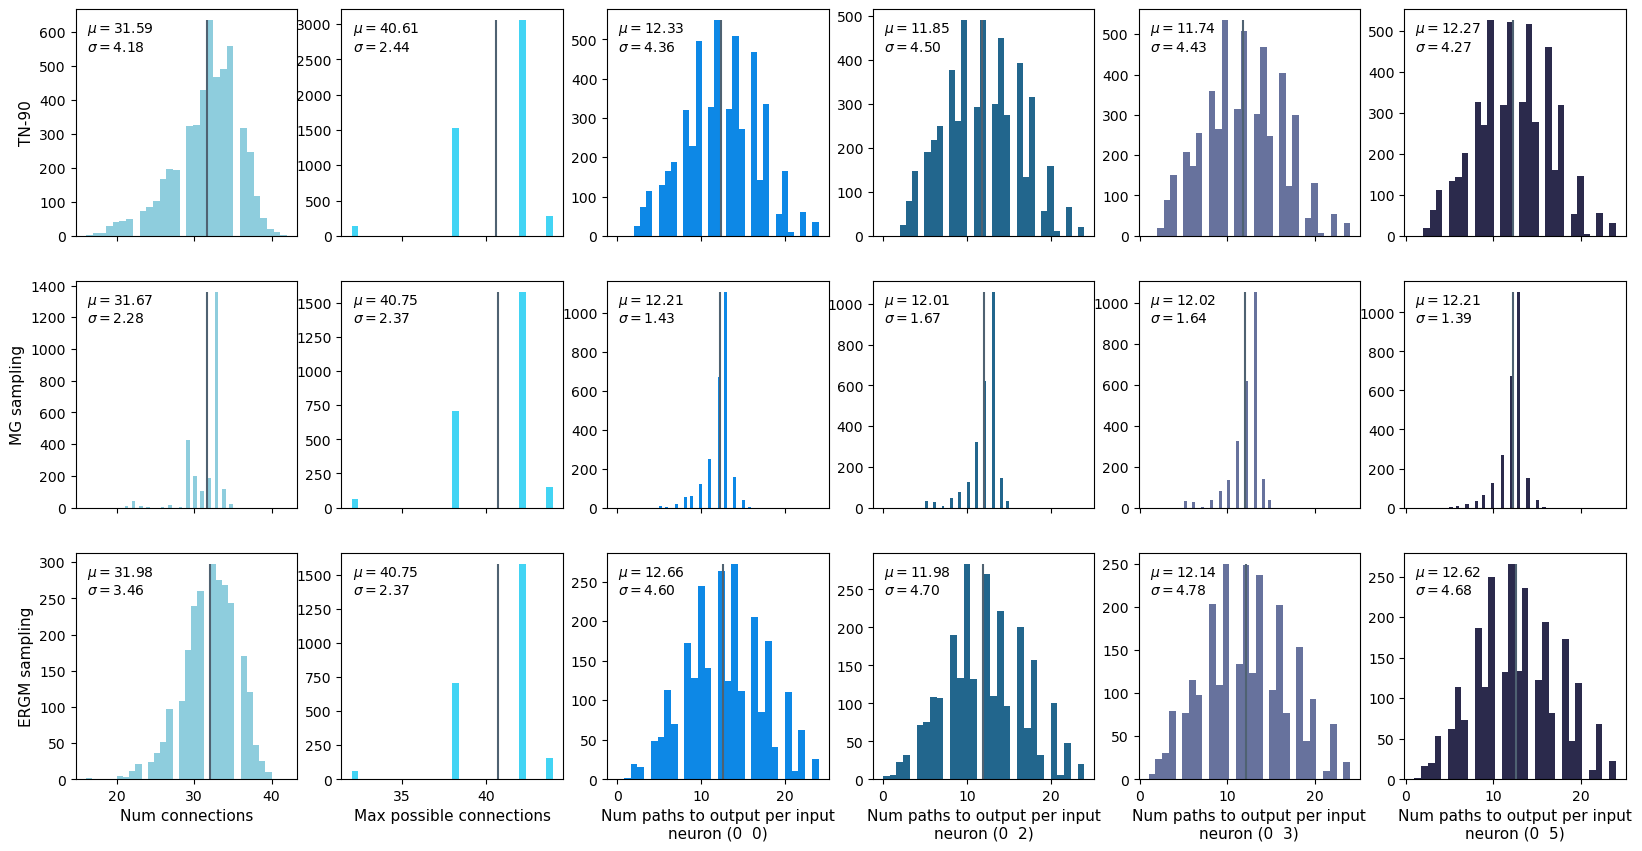

In [13]:
sorted_blues = ["#0d88e6", "#8ECDDD", "#466964", "#6cd4c5", "#22668D", "#42d4f4", ]
sorted_blues = [ "#8ECDDD",  "#42d4f4","#0d88e6","#22668D", "#67729D", "#2B2A4C", ]

turquoise = ["#466964", "#6cd4c5", "#466964", "#22668D",]
plt.figure()
num_columns = len(feature_names)
fig, axs = plt.subplots(3, num_columns, figsize=(20, 10), sharex='col')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
stds = [
    [] for _ in labels
]
varss = [
    [] for _ in labels
]
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (i, j) in enumerate(idxs):
    f_name = feature_names[j]
    n, p, t = axs[i, j].hist(data[i][f_name], bins=30, color=sorted_blues[j])
    axs[i, j].vlines(data[i][f_name].mean(), ymin=0, ymax=max(n), colors=COLORS[0])
    textstr = '\n'.join((
    r'$\mu=%.2f$' % (data[i][f_name].mean(), ),
    r'$\sigma=%.2f$' % (data[i][f_name].std(), )))
    stds[i].append(data[i][f_name].std())
    varss[i].append(data[i][f_name].var())
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    axs[i, j].text(0.05, 0.95, textstr, transform=axs[i, j].transAxes, fontsize=10,
        verticalalignment='top',)
for i, l in enumerate(labels):
    axs[i, 0].set_ylabel(textwrap.fill(l.replace('_', ' '), width=20,
                                       break_long_words=False),fontsize=11,)
for i, l in enumerate(feature_names):
    axs[2, i].set_xlabel(textwrap.fill(l.capitalize().replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=11,)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_ergm_vs_other_distd_random_init_feature_dist.png", dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

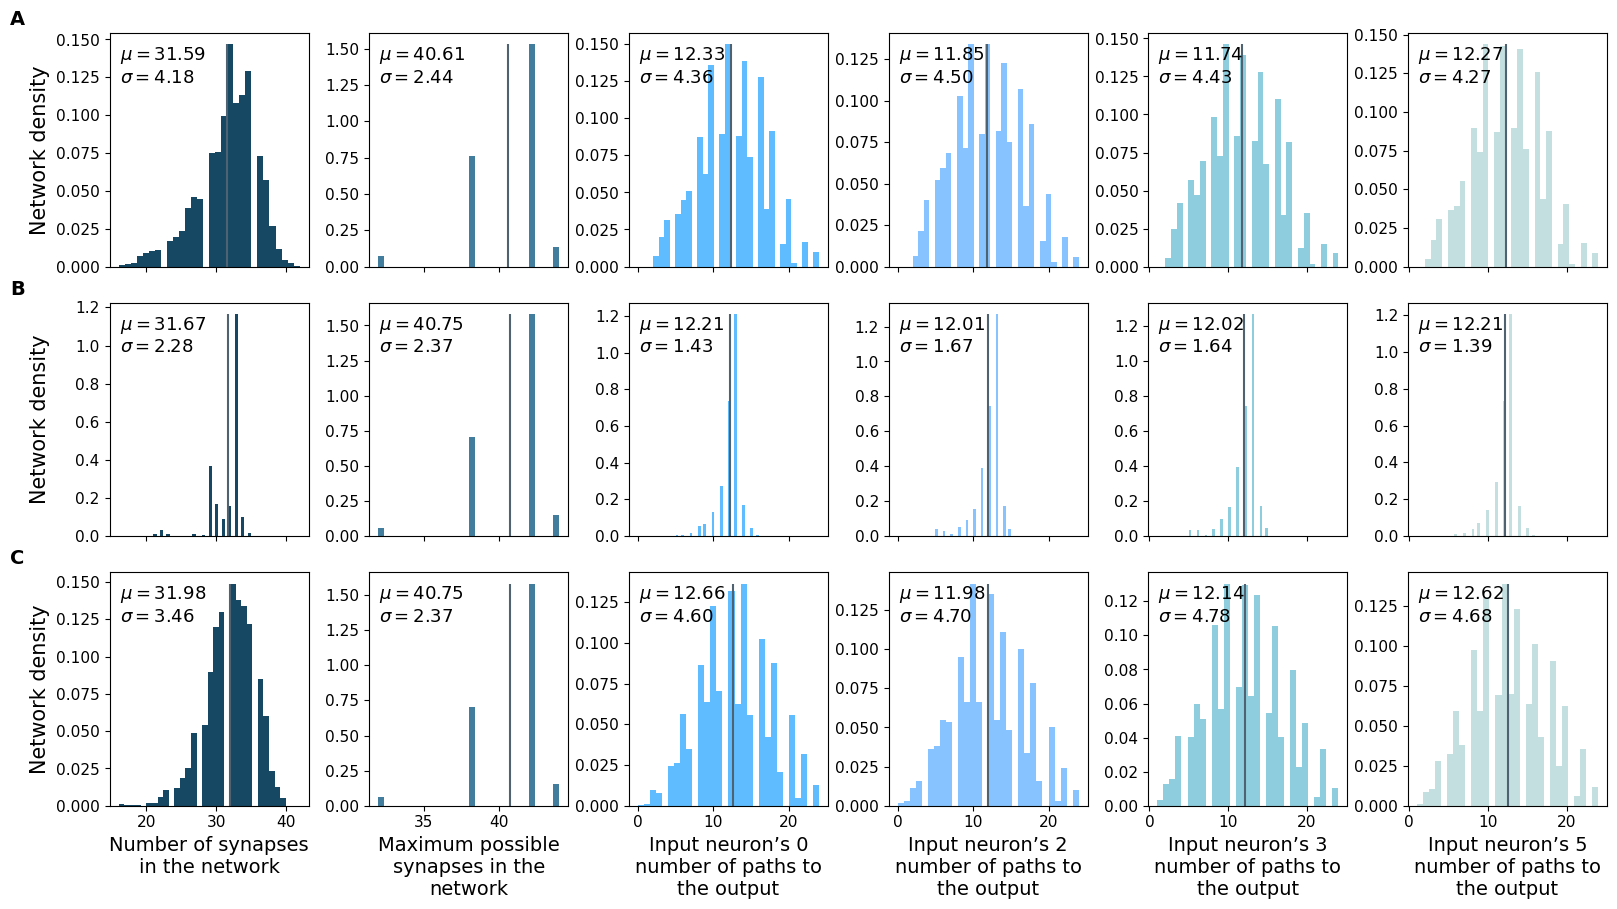

In [14]:

plt.figure()
num_columns = len(feature_names)
fig, axs = plt.subplots(3,num_columns , figsize=(16, 9), sharex='col', )
min_x = 1.0
max_x = 0
idxs = []
stds = [
    [] for _ in labels
]
varss = [
    [] for _ in labels
]
sorted_blues = [
"#164863",
    "#427D9D",
        "#5FBDFF",

    "#87C4FF",
    "#8ECDDD",
    "#C4DFDF",
]
params =   {
        'max_possible_connections': 'Maximum possible synapses in the network',
        'num_connections': "Number of synapses in the network",
        'num_paths_to_output_per_input_neuron_(0_ 0)': f"Input neuron’s 0 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 2)': f"Input neuron’s 2 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 3)': f"Input neuron’s 3 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 5)': f"Input neuron’s 5 number of paths to the output",
    }
nums = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'], ['J', 'K', 'L'], ['M', 'N', 'O'], ['P','K','R'], ]
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (i, j) in enumerate(idxs):
    f_name = feature_names[j]
    n, p, t = axs[i, j].hist(data[i][f_name], bins=30, color=sorted_blues[j], density=True)
    axs[i, j].vlines(data[i][f_name].mean(), ymin=0, ymax=max(n), colors=COLORS[0])
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (data[i][f_name].mean(),),
        r'$\sigma=%.2f$' % (data[i][f_name].std(),)))
    stds[i].append(data[i][f_name].std())
    varss[i].append(data[i][f_name].var())


    axs[i, j].text(0.05, 0.95, textstr, transform=axs[i, j].transAxes, fontsize=13,
                   verticalalignment='top', )
    axs[i, 0].set_ylabel(textwrap.fill('Network density', width=20,
                                       break_long_words=False), fontsize=15, )
    if j == 0:
        axs[i, j].text(-0.5, 1.1, nums[j][i], transform=axs[i, j].transAxes, fontsize=14, verticalalignment='top', weight="bold")
    axs[i, j].tick_params(axis='both', labelsize=11)
    fig.align_ylabels(axs[j:])
for i, l in enumerate(feature_names):
    l = params[l]
    axs[2, i].set_xlabel(textwrap.fill(l,width=18,
                                       break_long_words=False), fontsize=14, )
fig.tight_layout(pad=0.5)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_ergm_vs_other_distd_random_init_feature_dist_.png",  bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

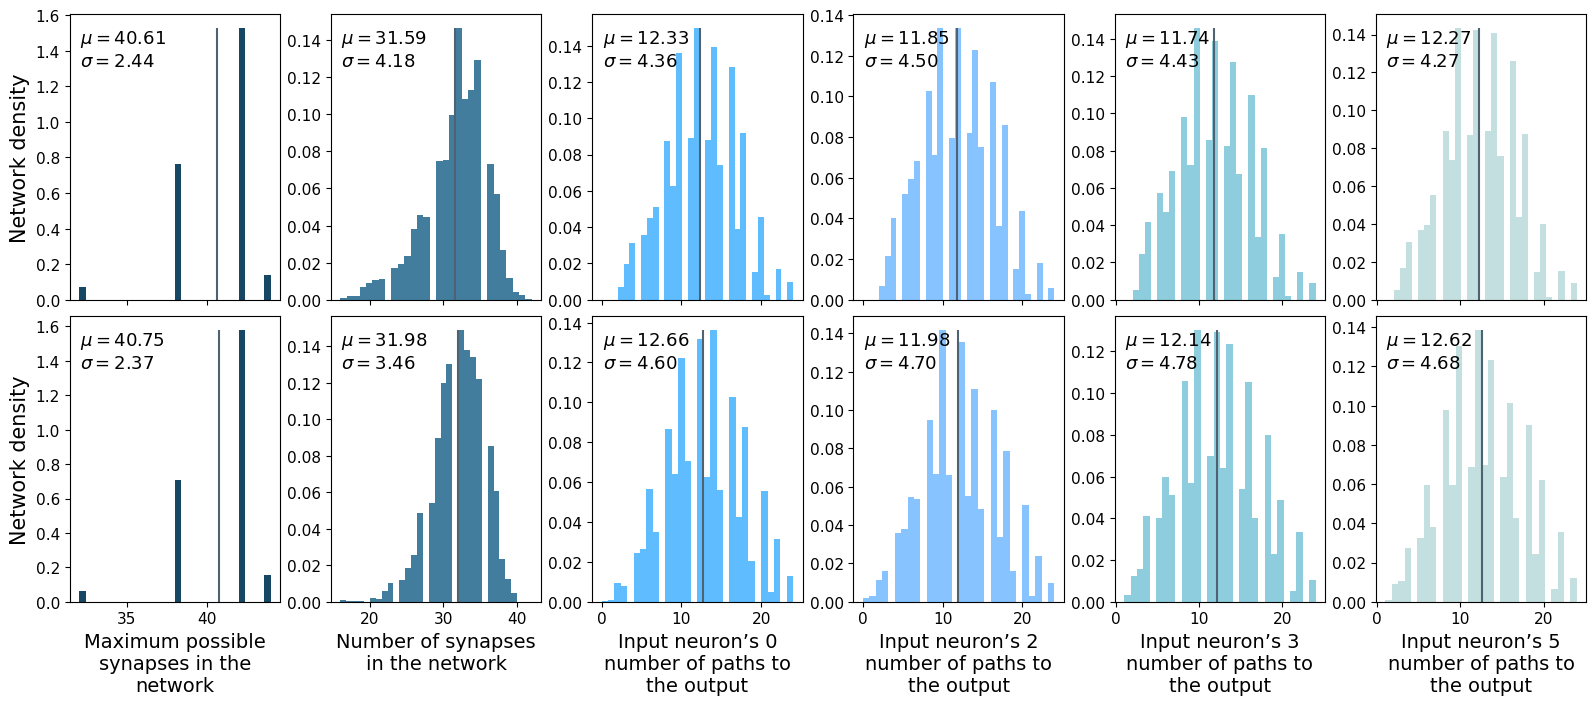

In [15]:
num_columns = len(feature_names)
feature_names = list(db_feature_values.columns)
feature_names = sorted(feature_names)
data = [
    db_feature_values,
   ergm_random_init_feature_values,
]
labels = [
    'TN-90',
    'ERGM sampling',
]
plt.figure()
fig, axs = plt.subplots(2,num_columns , figsize=(16, 7), sharex='col', )
min_x = 1.0
max_x = 0
idxs = []
stds = [
    [] for _ in labels
]
varss = [
    [] for _ in labels
]

sorted_blues = [
"#164863",
    "#427D9D",
        "#5FBDFF",

    "#87C4FF",
    "#8ECDDD",
    "#C4DFDF",
]
params =   {
        'max_possible_connections': 'Maximum possible synapses in the network',
        'num_connections': "Number of synapses in the network",
        'num_paths_to_output_per_input_neuron_(0_ 0)': f"Input neuron’s 0 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 2)': f"Input neuron’s 2 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 3)': f"Input neuron’s 3 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 5)': f"Input neuron’s 5 number of paths to the output",
    }
nums = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'], ['J', 'K', 'L'], ['M', 'N', 'O'], ['P','K','R'], ]
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (i, j) in enumerate(idxs):
    f_name = feature_names[j]
    n, p, t = axs[i, j].hist(data[i][f_name], bins=30, color=sorted_blues[j], density=True)
    axs[i, j].vlines(data[i][f_name].mean(), ymin=0, ymax=max(n), colors=COLORS[0])
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (data[i][f_name].mean(),),
        r'$\sigma=%.2f$' % (data[i][f_name].std(),)))
    stds[i].append(data[i][f_name].std())
    varss[i].append(data[i][f_name].var())


    axs[i, j].text(0.05, 0.95, textstr, transform=axs[i, j].transAxes, fontsize=13,
                   verticalalignment='top', )
    axs[i, 0].set_ylabel(textwrap.fill('Network density', width=20,
                                       break_long_words=False), fontsize=15, )

    axs[i, j].tick_params(axis='both', labelsize=11)
    fig.align_ylabels(axs[j:])
for i, l in enumerate(feature_names):
    l = params[l]
    axs[1, i].set_xlabel(textwrap.fill(l,width=18,
                                       break_long_words=False), fontsize=14, )
fig.tight_layout(pad=0.5)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_ergm_vs_other_distd_random_init_feature_dist_.png",  bbox_inches='tight')
plt.show()

In [17]:
for i in range(len(feature_names)):
    print(feature_names[i], round(varss[1][i]/varss[0][i], 3))

max_possible_connections 0.939
num_connections 0.688
num_paths_to_output_per_input_neuron_(0_ 0) 1.115
num_paths_to_output_per_input_neuron_(0_ 2) 1.093
num_paths_to_output_per_input_neuron_(0_ 3) 1.167
num_paths_to_output_per_input_neuron_(0_ 5) 1.201


In [18]:
sum(varss[1][i]/varss[0][i] for i in range(len(feature_names)))/len(feature_names)

1.0338111225443793

In [16]:
print('ergm')
round(np.mean([ ((varss[-1][i]-varss[0][i])/varss[0][i] ) for i in [0,2,3,4,5]]), 2)

ergm


0.1

In [ ]:
print('MG')
round(np.mean([((varss[-2][i]-varss[0][i]) / varss[0][i]) for i in [0, 2, 3, 4, 5]]), 2)


In [23]:
round(np.mean([varss[-2] for i in [0, 2, 3, 4, 5]])/np.mean([varss[0]for i in [0, 2, 3, 4, 5]]), 3)

0.202

In [76]:
round(np.mean([ (stds[-1][i]-stds[0][i] )/stds[0][i] for i in [0,2,3,4,5]]), 2)

0.02

In [75]:
round(np.mean([ (stds[1][i]-stds[0][i] )/stds[0][i] for i in [0,2,3,4,5]]), 2)


-0.61